In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=20
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9868858994752659807
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8833273037
locality {
  bus_id: 1
}
incarnation: 154304736342474620
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.9922416 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.10583778 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.058210712 , acc = 1.0 
Epoch 1 , step 300 , loss= 0.08472545 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.114689104 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.08104271 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.06923969 val_loss= 0.10526155 , acc = 0.98 val acc = 0.9662 
Epoch 1 finished, loss= 0.220874 val loss= 0.10526155 ,  acc = 0.9499818 val acc = 0.9662

Epoch 2 , step 50 , loss= 0.017966567 , acc = 0.99 
Epoch 2 , step 150 , loss= 0.012570604 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.015433839 , acc = 1.0 
Ep

Epoch 17 , step 400 , loss= 0.0013103434 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00043258668 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00042330287 val_loss= 0.10255059 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.0019744236 val loss= 0.10255059 ,  acc = 0.99972725 val acc = 0.9812

Epoch 18 , step 50 , loss= 7.699802e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0005810577 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00029793242 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0028908974 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.001291955 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0002482321 val_loss= 0.103534006 , acc = 1.0 val acc = 0.9834 
Epoch 18 finished, loss= 0.0009892691 val loss= 0.103534006 ,  acc = 0.9998544 val acc = 0.9834

Epoch 19 , step 0 , loss= 0.0019215879 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.5319289e-05 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.00024163236 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.0016887471 , acc = 1.0 
Epoch 19 , step 400 , loss

Plotting loss...


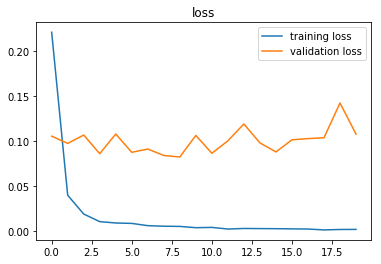

Plotting metrics...


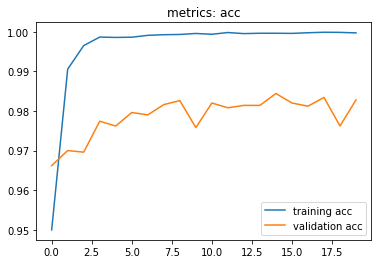

train {'acc': 0.9981818}
test {'acc': 0.9801}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

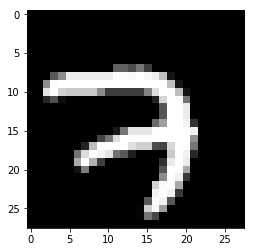

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.2416029e-24 2.0141148e-23 8.2136368e-17 1.6127624e-20 2.1509384e-21
 5.8212543e-24 1.9801792e-34 1.0000000e+00 4.9459207e-32 7.0513298e-23]


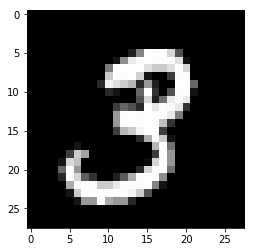

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.7509041e-34 3.9930926e-25 1.4881000e-28 1.0000000e+00 7.6027495e-32
 7.6615994e-22 6.1548890e-35 3.2974195e-26 6.4190730e-19 3.8242697e-19]


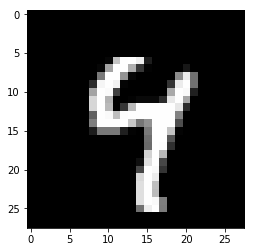

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.8555000e-24 2.8591057e-18 1.2476768e-22 6.9886777e-20 1.0000000e+00
 7.4656734e-21 9.3882369e-20 1.9155875e-15 3.3616111e-17 1.7457487e-09]


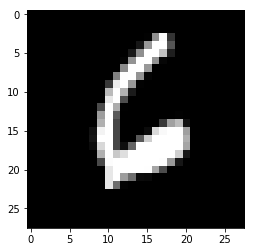

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.1652412e-18 1.7309603e-21 1.1219523e-15 6.4232488e-23 7.6937012e-14
 5.1349827e-14 1.0000000e+00 7.6978010e-24 6.4409100e-17 6.0597468e-19]


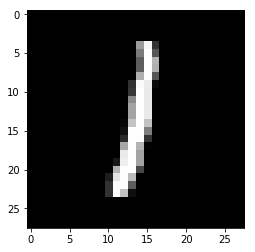

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9326511e-12 1.0000000e+00 1.1109205e-10 1.3408114e-13 1.0015258e-10
 1.0042257e-12 9.1037025e-11 1.4584299e-09 3.0470939e-09 7.8793005e-12]


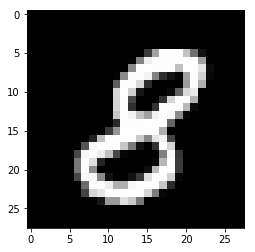

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3748809e-17 1.9040459e-13 3.8159809e-10 9.2701064e-12 8.2114164e-16
 3.4607948e-20 1.7056811e-18 5.4617619e-18 1.0000000e+00 1.3912499e-14]


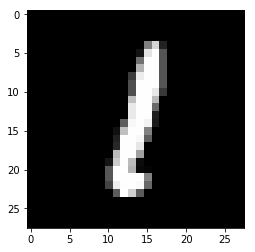

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.1841584e-14 9.9999940e-01 1.7624648e-10 6.5261374e-16 3.6500615e-11
 1.0537957e-14 3.0024891e-10 1.3706286e-10 6.2255071e-07 8.5882677e-16]


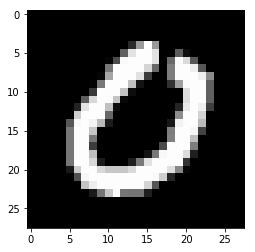

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00000000e+00 8.76125717e-19 1.55558554e-16 4.63882260e-25
 2.61194177e-16 2.40159527e-22 1.31881785e-14 1.89599326e-13
 4.38529102e-23 1.11820459e-16]


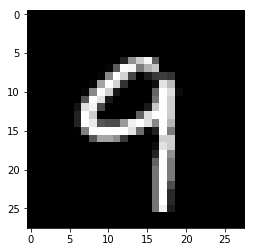

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6.2310184e-16 1.9372113e-18 9.3263104e-19 5.2545973e-15 2.4378810e-10
 3.9424907e-19 5.6786753e-21 3.4066213e-12 2.7684186e-15 1.0000000e+00]


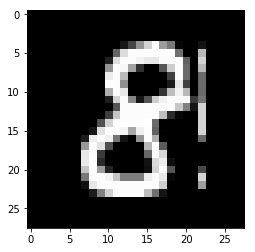

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[9.9914232e-23 1.8524611e-17 3.1292110e-16 1.0456315e-14 8.3539973e-18
 8.0846534e-19 7.0957516e-21 3.0238774e-24 1.0000000e+00 8.3140117e-16]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=30,activation_fn=tf.nn.relu))
#     smallmodel.add_layer(
#         FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-4) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-4)
            , metrics = ['acc']
        )
    return smallmodel

In [13]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=20
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2997553457315910511
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8118039348
locality {
  bus_id: 1
}
incarnation: 5627890450019554547
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3179727 , acc = 0.11 
Epoch 1 , step 100 , loss= 2.1361043 , acc = 0.29 
Epoch 1 , step 200 , loss= 1.8888179 , acc = 0.53 
Epoch 1 , step 300 , loss= 1.6168774 , acc = 0.72 
Epoch 1 , step 400 , loss= 1.2698727 , acc = 0.77 
Epoch 1 , step 500 , loss= 1.1070206 , acc = 0.82 
Epoch 1 , step 549 , loss= 1.1094021 val_loss= 1.0487108 , acc = 0.75 val acc = 0.7938 
Epoch 1 finished, loss= 1.6854761 val loss= 1.0487108 ,  acc = 0.55869097 val acc = 0.7938

Epoch 2 , step 50 , loss= 1.0014292 , acc = 0.83 
Epoch 2 , step 150 , loss= 0.94268763 , acc = 0.79 
Epoch 2 , step 250 , loss= 0.82502866 , acc = 0.79 
Epoch 2 , 

Epoch 18 , step 50 , loss= 0.27053022 , acc = 0.95 
Epoch 18 , step 150 , loss= 0.19372386 , acc = 0.95 
Epoch 18 , step 250 , loss= 0.2925393 , acc = 0.93 
Epoch 18 , step 350 , loss= 0.27817428 , acc = 0.9 
Epoch 18 , step 450 , loss= 0.19911419 , acc = 0.96 
Epoch 18 , step 549 , loss= 0.1703858 val_loss= 0.22596428 , acc = 0.97 val acc = 0.9352 
Epoch 18 finished, loss= 0.23764557 val loss= 0.22596428 ,  acc = 0.9329091 val acc = 0.9352

Epoch 19 , step 0 , loss= 0.2383718 , acc = 0.93 
Epoch 19 , step 100 , loss= 0.28878215 , acc = 0.91 
Epoch 19 , step 200 , loss= 0.21479577 , acc = 0.93 
Epoch 19 , step 300 , loss= 0.25250247 , acc = 0.9 
Epoch 19 , step 400 , loss= 0.33443123 , acc = 0.9 
Epoch 19 , step 500 , loss= 0.3484744 , acc = 0.92 
Epoch 19 , step 549 , loss= 0.34963673 val_loss= 0.22162339 , acc = 0.88 val acc = 0.9368 
Epoch 19 finished, loss= 0.23270552 val loss= 0.22162339 ,  acc = 0.9342 val acc = 0.9368

Epoch 20 , step 50 , loss= 0.22549716 , acc = 0.92 
Epoch 20

Small model
Plotting loss...


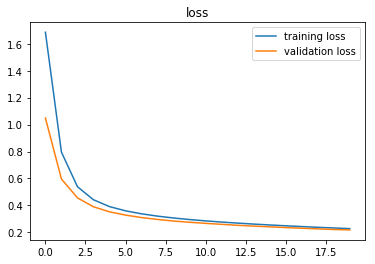

Plotting metrics...


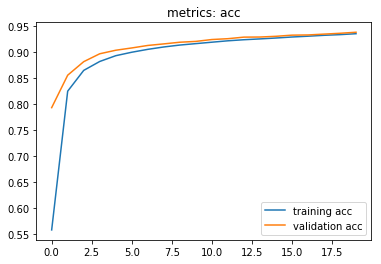

train {'acc': 0.9368909}
test {'acc': 0.9361}


In [14]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

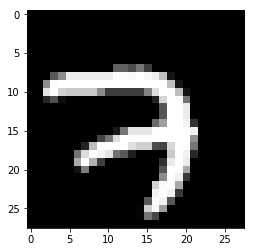

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[4.3683362e-06 6.2735394e-06 1.3109775e-01 1.2690272e-02 1.2294855e-05
 1.0192661e-04 4.2481452e-06 8.5366982e-01 1.4568719e-03 9.5617288e-04]


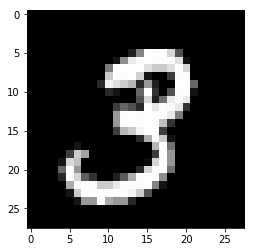

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.8446864e-06 3.0136416e-06 3.1607552e-04 9.9562645e-01 8.7773628e-08
 1.6419347e-04 2.7046212e-09 1.7246879e-05 3.3751428e-03 4.9299648e-04]


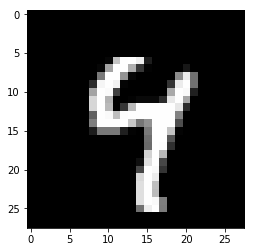

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.9625683e-06 3.8986354e-07 8.1572525e-06 1.9972799e-03 2.8325278e-01
 5.9228460e-03 8.1735507e-06 1.7157997e-03 1.7944869e-02 6.8914676e-01]


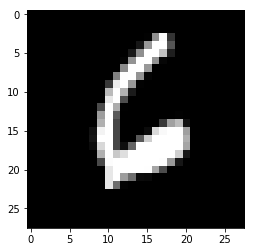

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.6070773e-03 3.9099208e-07 1.1756132e-02 5.3857252e-06 4.3567545e-03
 1.8511579e-03 9.8034507e-01 2.4206693e-05 1.1287248e-05 4.2496351e-05]


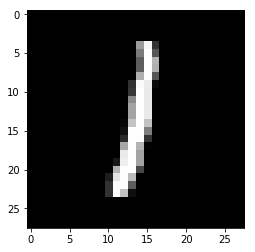

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.8820623e-06 9.9440742e-01 1.6027912e-03 1.5286730e-03 5.8938681e-06
 3.9432818e-04 1.6281028e-04 1.5148186e-04 1.6711791e-03 7.3701296e-05]


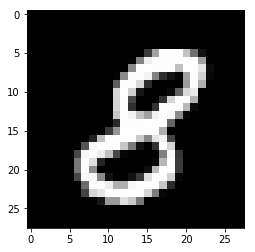

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4.5859422e-05 3.8778816e-07 3.2654151e-04 9.9268567e-04 1.1333372e-05
 5.8944896e-04 1.0121956e-05 7.9839335e-09 9.9763894e-01 3.8471262e-04]


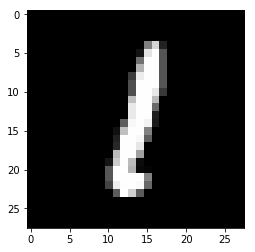

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0577062e-06 9.9111056e-01 1.7674917e-03 1.7940155e-03 2.0332948e-06
 2.2545943e-04 1.0956905e-04 8.5262582e-05 4.8747216e-03 2.9853471e-05]


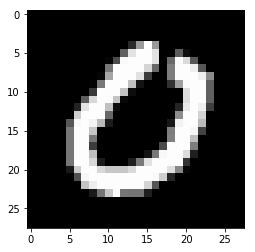

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9912018e-01 8.7060090e-12 2.6172936e-06 2.6375421e-06 1.1178050e-08
 8.5558917e-04 5.0394551e-06 7.3850845e-07 1.0378553e-05 2.8727454e-06]


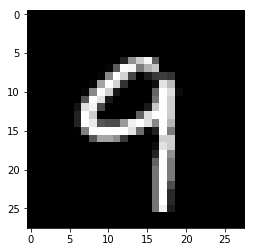

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.9895473e-05 2.4860485e-05 1.0608572e-04 1.5463212e-03 5.0724316e-02
 1.6886406e-03 1.7938751e-04 2.9987269e-03 4.3933517e-03 9.3829840e-01]


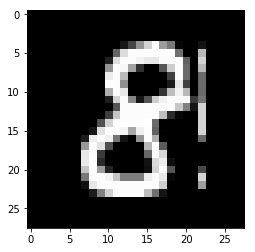

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4.59036411e-04 6.58009640e-07 1.80129532e-03 1.51674636e-03
 9.03387408e-05 1.24532473e-03 1.10544293e-04 2.96702196e-09
 9.94674444e-01 1.01567566e-04]


In [15]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

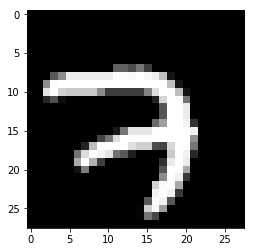

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.2416029e-24 2.0141148e-23 8.2136368e-17 1.6127624e-20 2.1509384e-21
 5.8212543e-24 1.9801792e-34 1.0000000e+00 4.9459207e-32 7.0513298e-23]


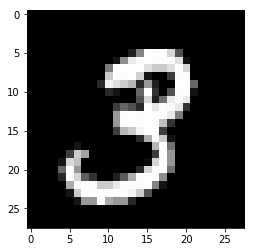

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.7509041e-34 3.9930926e-25 1.4881000e-28 1.0000000e+00 7.6027495e-32
 7.6615994e-22 6.1548890e-35 3.2974195e-26 6.4190730e-19 3.8242697e-19]


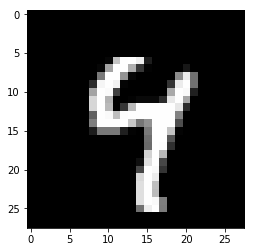

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.8555000e-24 2.8591057e-18 1.2476768e-22 6.9886777e-20 1.0000000e+00
 7.4656734e-21 9.3882369e-20 1.9155875e-15 3.3616111e-17 1.7457487e-09]


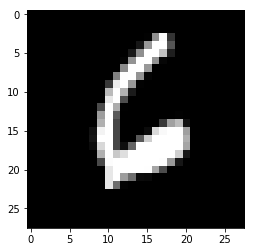

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.1652412e-18 1.7309603e-21 1.1219523e-15 6.4232488e-23 7.6937012e-14
 5.1349827e-14 1.0000000e+00 7.6978010e-24 6.4409100e-17 6.0597468e-19]


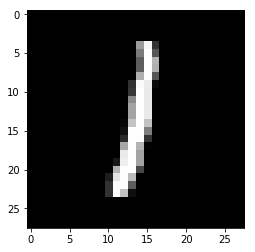

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9326511e-12 1.0000000e+00 1.1109205e-10 1.3408114e-13 1.0015258e-10
 1.0042257e-12 9.1037025e-11 1.4584299e-09 3.0470939e-09 7.8793005e-12]


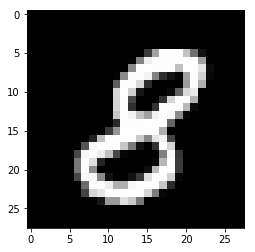

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3748809e-17 1.9040459e-13 3.8159809e-10 9.2701064e-12 8.2114164e-16
 3.4607948e-20 1.7056811e-18 5.4617619e-18 1.0000000e+00 1.3912499e-14]


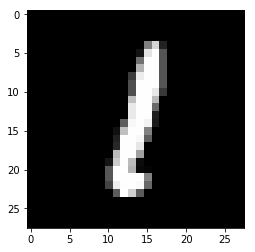

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.1841584e-14 9.9999940e-01 1.7624648e-10 6.5261374e-16 3.6500615e-11
 1.0537957e-14 3.0024891e-10 1.3706286e-10 6.2255071e-07 8.5882677e-16]


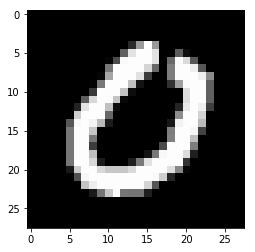

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00000000e+00 8.76125717e-19 1.55558554e-16 4.63882260e-25
 2.61194177e-16 2.40159527e-22 1.31881785e-14 1.89599326e-13
 4.38529102e-23 1.11820459e-16]


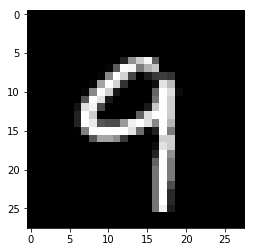

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6.2310184e-16 1.9372113e-18 9.3263104e-19 5.2545973e-15 2.4378810e-10
 3.9424907e-19 5.6786753e-21 3.4066213e-12 2.7684186e-15 1.0000000e+00]


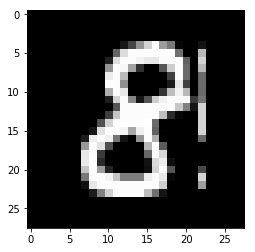

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[9.9914232e-23 1.8524611e-17 3.1292110e-16 1.0456315e-14 8.3539973e-18
 8.0846534e-19 7.0957516e-21 3.0238774e-24 1.0000000e+00 8.3140117e-16]


In [16]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

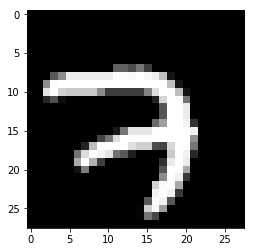

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.2416029e-24 2.0141148e-23 8.2136368e-17 1.6127624e-20 2.1509384e-21
 5.8212543e-24 1.9801792e-34 1.0000000e+00 4.9459207e-32 7.0513298e-23]


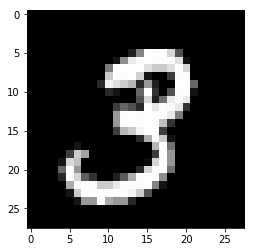

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.7509041e-34 3.9930926e-25 1.4881000e-28 1.0000000e+00 7.6027495e-32
 7.6615994e-22 6.1548890e-35 3.2974195e-26 6.4190730e-19 3.8242697e-19]


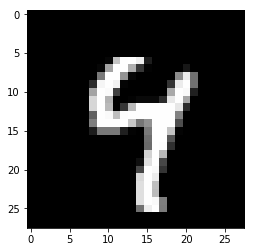

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.8555000e-24 2.8591057e-18 1.2476768e-22 6.9886777e-20 1.0000000e+00
 7.4656734e-21 9.3882369e-20 1.9155875e-15 3.3616111e-17 1.7457487e-09]


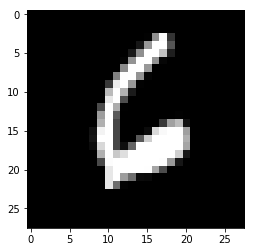

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.1652412e-18 1.7309603e-21 1.1219523e-15 6.4232488e-23 7.6937012e-14
 5.1349827e-14 1.0000000e+00 7.6978010e-24 6.4409100e-17 6.0597468e-19]


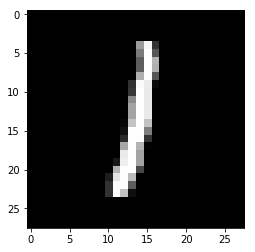

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9326511e-12 1.0000000e+00 1.1109205e-10 1.3408114e-13 1.0015258e-10
 1.0042257e-12 9.1037025e-11 1.4584299e-09 3.0470939e-09 7.8793005e-12]


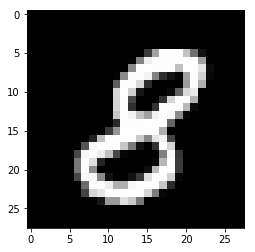

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3748809e-17 1.9040459e-13 3.8159809e-10 9.2701064e-12 8.2114164e-16
 3.4607948e-20 1.7056811e-18 5.4617619e-18 1.0000000e+00 1.3912499e-14]
Training student with temperature = 2 , coef = 1.0 .
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6227708775098036147
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8118039348
locality {
  bus_id: 1
}
incarnation: 1649263947873151326
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3151755 , acc = 0.11 
Epoch 1 , step 100 , loss= 2.1993685 , acc = 0.33 
Epoch 1 , step 200 , loss= 2.0830734 , acc = 0.52 
Epoch 1 , step 300 , loss= 1.9138027 , acc = 0.49 
Epoch 1 , step 400 , loss= 1.7390721 , acc = 0.65 
Epoch 1 , step 500 , loss= 1.5714521 , acc = 0.78 
Epoch 1 , step 549 , loss= 1.3743666 val_loss= 1.4678481 , acc = 0.84 val acc = 0.7338 
Epoch 1 finished, loss= 1.88

Epoch 19 , step 500 , loss= 0.3124918 , acc = 0.9 
Epoch 19 , step 549 , loss= 0.5141214 val_loss= 0.2600034 , acc = 0.85 val acc = 0.926 
Epoch 19 finished, loss= 0.49967763 
Epoch 20 , step 50 , loss= 0.20694183 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.19249615 , acc = 0.95 
Epoch 20 , step 250 , loss= 0.35663086 , acc = 0.88 
Epoch 20 , step 350 , loss= 0.30582547 , acc = 0.89 
Epoch 20 , step 450 , loss= 0.39241 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.254359 val_loss= 0.2564925 , acc = 0.95 val acc = 0.9276 
Epoch 20 finished, loss= 0.48975912 
Epoch 21 , step 0 , loss= 0.21079807 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.34113666 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.17077902 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.22666787 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.24712448 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.22397342 , acc = 0.92 
Epoch 21 , step 549 , loss= 0.15390025 val_loss= 0.25325578 , acc = 0.98 val acc = 0.9292 
Epoch 21 finished, loss= 0.4762

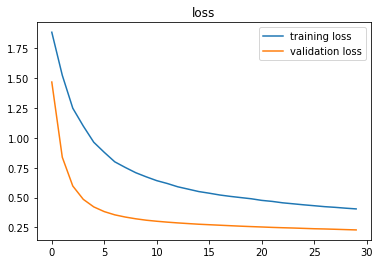

Plotting metrics...


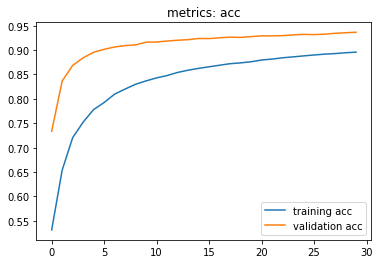

train {'acc': 0.9342}
test {'acc': 0.933}



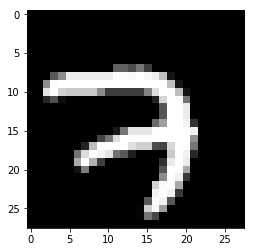

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.2416029e-24 2.0141148e-23 8.2136368e-17 1.6127624e-20 2.1509384e-21
 5.8212543e-24 1.9801792e-34 1.0000000e+00 4.9459207e-32 7.0513298e-23]


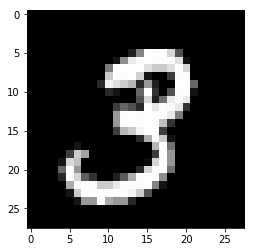

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.7509041e-34 3.9930926e-25 1.4881000e-28 1.0000000e+00 7.6027495e-32
 7.6615994e-22 6.1548890e-35 3.2974195e-26 6.4190730e-19 3.8242697e-19]


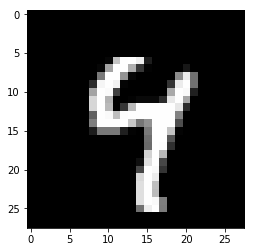

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.8555000e-24 2.8591057e-18 1.2476768e-22 6.9886777e-20 1.0000000e+00
 7.4656734e-21 9.3882369e-20 1.9155875e-15 3.3616111e-17 1.7457487e-09]


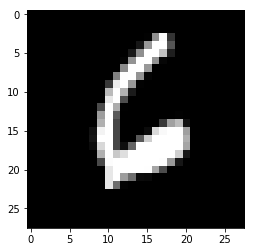

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.1652412e-18 1.7309603e-21 1.1219523e-15 6.4232488e-23 7.6937012e-14
 5.1349827e-14 1.0000000e+00 7.6978010e-24 6.4409100e-17 6.0597468e-19]


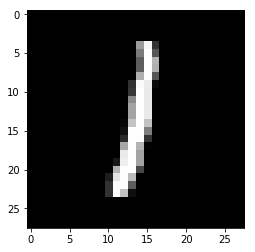

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9326511e-12 1.0000000e+00 1.1109205e-10 1.3408114e-13 1.0015258e-10
 1.0042257e-12 9.1037025e-11 1.4584299e-09 3.0470939e-09 7.8793005e-12]


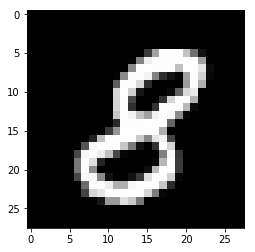

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3748809e-17 1.9040459e-13 3.8159809e-10 9.2701064e-12 8.2114164e-16
 3.4607948e-20 1.7056811e-18 5.4617619e-18 1.0000000e+00 1.3912499e-14]
Training student with temperature = 4 , coef = 1.0 .
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4759542314538642645
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8118039348
locality {
  bus_id: 1
}
incarnation: 9623352870021093835
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300851 , acc = 0.14 
Epoch 1 , step 100 , loss= 2.249257 , acc = 0.32 
Epoch 1 , step 200 , loss= 2.1500354 , acc = 0.48 
Epoch 1 , step 300 , loss= 2.0407798 , acc = 0.62 
Epoch 1 , step 400 , loss= 1.9308689 , acc = 0.64 
Epoch 1 , step 500 , loss= 1.8229254 , acc = 0.75 
Epoch 1 , step 549 , loss= 1.6902472 val_loss= 1.7216277 , acc = 0.78 val acc = 0.7344 
Epoch 1 finished, loss= 2.0264

Epoch 19 , step 500 , loss= 0.32734108 , acc = 0.93 
Epoch 19 , step 549 , loss= 0.331175 val_loss= 0.38424313 , acc = 0.96 val acc = 0.9202 
Epoch 19 finished, loss= 0.64476436 
Epoch 20 , step 50 , loss= 0.333245 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.40890977 , acc = 0.9 
Epoch 20 , step 250 , loss= 0.51375103 , acc = 0.92 
Epoch 20 , step 350 , loss= 0.5529349 , acc = 0.89 
Epoch 20 , step 450 , loss= 0.5382238 , acc = 0.88 
Epoch 20 , step 549 , loss= 0.3961762 val_loss= 0.38119298 , acc = 0.92 val acc = 0.9196 
Epoch 20 finished, loss= 0.63610786 
Epoch 21 , step 0 , loss= 0.37291926 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.3850278 , acc = 0.92 
Epoch 21 , step 200 , loss= 0.45173186 , acc = 0.91 
Epoch 21 , step 300 , loss= 0.47647533 , acc = 0.89 
Epoch 21 , step 400 , loss= 0.3224286 , acc = 0.92 
Epoch 21 , step 500 , loss= 0.3581343 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.42791873 val_loss= 0.37787965 , acc = 0.93 val acc = 0.9204 
Epoch 21 finished, loss= 0.6240

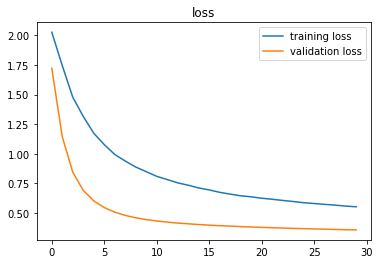

Plotting metrics...


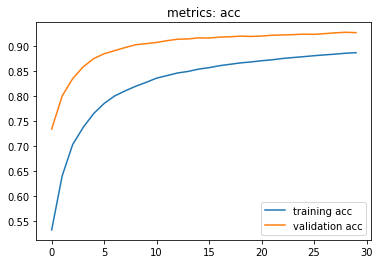

train {'acc': 0.9250364}
test {'acc': 0.9273}



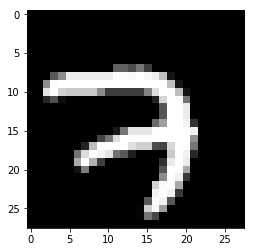

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.2416029e-24 2.0141148e-23 8.2136368e-17 1.6127624e-20 2.1509384e-21
 5.8212543e-24 1.9801792e-34 1.0000000e+00 4.9459207e-32 7.0513298e-23]


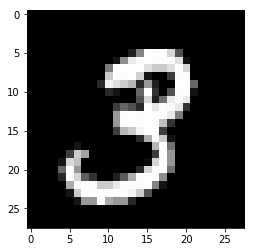

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.7509041e-34 3.9930926e-25 1.4881000e-28 1.0000000e+00 7.6027495e-32
 7.6615994e-22 6.1548890e-35 3.2974195e-26 6.4190730e-19 3.8242697e-19]


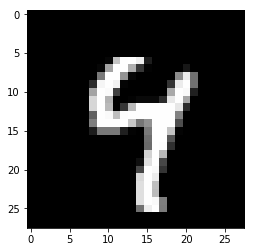

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.8555000e-24 2.8591057e-18 1.2476768e-22 6.9886777e-20 1.0000000e+00
 7.4656734e-21 9.3882369e-20 1.9155875e-15 3.3616111e-17 1.7457487e-09]


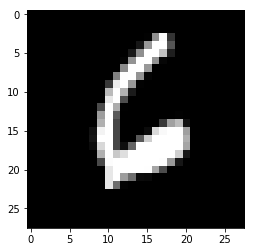

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.1652412e-18 1.7309603e-21 1.1219523e-15 6.4232488e-23 7.6937012e-14
 5.1349827e-14 1.0000000e+00 7.6978010e-24 6.4409100e-17 6.0597468e-19]


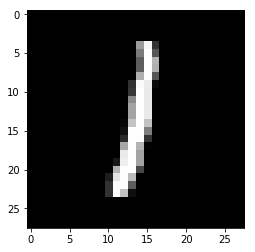

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9326511e-12 1.0000000e+00 1.1109205e-10 1.3408114e-13 1.0015258e-10
 1.0042257e-12 9.1037025e-11 1.4584299e-09 3.0470939e-09 7.8793005e-12]


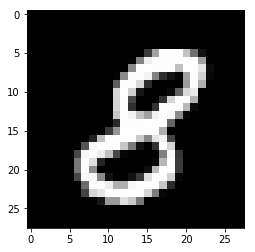

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3748809e-17 1.9040459e-13 3.8159809e-10 9.2701064e-12 8.2114164e-16
 3.4607948e-20 1.7056811e-18 5.4617619e-18 1.0000000e+00 1.3912499e-14]
Training student with temperature = 8 , coef = 1.0 .
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13515641025037099352
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8118039348
locality {
  bus_id: 1
}
incarnation: 9301335854053535432
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3056684 , acc = 0.12 
Epoch 1 , step 100 , loss= 2.2817109 , acc = 0.22 
Epoch 1 , step 200 , loss= 2.236415 , acc = 0.35 
Epoch 1 , step 300 , loss= 2.181921 , acc = 0.43 
Epoch 1 , step 400 , loss= 2.128252 , acc = 0.47 
Epoch 1 , step 500 , loss= 2.0843377 , acc = 0.54 
Epoch 1 , step 549 , loss= 2.0513167 val_loss= 2.0364304 , acc = 0.51 val acc = 0.6028 
Epoch 1 finished, loss= 2.1813

Epoch 20 , step 50 , loss= 0.9279711 , acc = 0.9 
Epoch 20 , step 150 , loss= 0.887609 , acc = 0.91 
Epoch 20 , step 250 , loss= 0.9307682 , acc = 0.92 
Epoch 20 , step 350 , loss= 0.8971323 , acc = 0.93 
Epoch 20 , step 450 , loss= 0.91430944 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.848839 val_loss= 0.8849529 , acc = 0.9 val acc = 0.9118 
Epoch 20 finished, loss= 1.1331263 
Epoch 21 , step 0 , loss= 0.998067 , acc = 0.89 
Epoch 21 , step 100 , loss= 0.9804979 , acc = 0.9 
Epoch 21 , step 200 , loss= 0.9453468 , acc = 0.86 
Epoch 21 , step 300 , loss= 0.88530177 , acc = 0.9 
Epoch 21 , step 400 , loss= 1.0253404 , acc = 0.91 
Epoch 21 , step 500 , loss= 0.851035 , acc = 0.94 
Epoch 21 , step 549 , loss= 0.85474104 val_loss= 0.881969 , acc = 0.95 val acc = 0.9118 
Epoch 21 finished, loss= 1.1229689 
Epoch 22 , step 50 , loss= 0.762709 , acc = 0.93 
Epoch 22 , step 150 , loss= 0.95395845 , acc = 0.87 
Epoch 22 , step 250 , loss= 0.9416002 , acc = 0.91 
Epoch 22 , step 350 , loss= 0.94

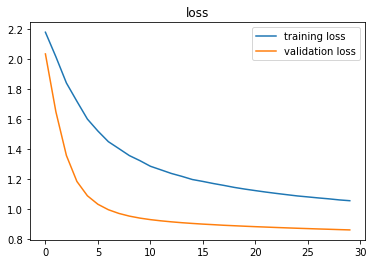

Plotting metrics...


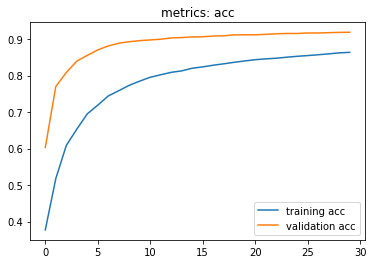

train {'acc': 0.9122364}
test {'acc': 0.9174}



In [17]:
# BUGFIX: already misorder
temperatures = [2,4,8]#,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    X_show, y_show = X_train.copy(), y_train.copy()
    y_pred = teacher.predict(X_show)
    plot_mnist(X_show, y_show, y_pred)
    for coef_softloss in [1.0]:
#     for coef_softloss in [1/(temperature**2), 1, temperature**2]:
        print('Training student with temperature =',temperature,', coef =',coef_softloss,'.')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss# * temperature**2
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=30
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,', coef =',coef_softloss,'.')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()

In [18]:
print(test_metrics)

{2: [{'acc': 0.933}], 4: [{'acc': 0.9273}], 8: [{'acc': 0.9174}]}


In [ ]:
# close_session(session)